<a href="https://colab.research.google.com/github/ktongk/BTT-JPMC-1/blob/Katrina/JPMorgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtaining a List of Tickers

In [1]:
! pip install --quiet yfinance ##--quiet mutes the package list as it’s installing

In [2]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly
import yfinance as yf
import pandas_datareader.data as web; yf.pdr_override()

In [3]:
start_date = '2023-03-02'
end_date  = '2023-03-21'

data_dir = '/data/'

In [4]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol   = data[0]
table_industry = data[0]['GICS Sector']
symbols = list(table_symbol.Symbol.values) ##companies
industries = list(table_industry.values) ##Industry Sector

symbols_industries_dict = {}
symbols_industries = data[0].iloc[:, [0,2]].values.tolist()
for pair in symbols_industries:
  keys, values = pair
  symbols_industries_dict[keys] = values

print("{} symbols in total".format(len(symbols)))
print("{} industries in total".format(len(industries)))
print(industries)

503 symbols in total
503 industries in total
['Industrials', 'Industrials', 'Health Care', 'Health Care', 'Information Technology', 'Consumer Staples', 'Information Technology', 'Industrials', 'Utilities', 'Financials', 'Health Care', 'Consumer Discretionary', 'Materials', 'Information Technology', 'Industrials', 'Materials', 'Real Estate', 'Health Care', 'Industrials', 'Utilities', 'Financials', 'Communication Services', 'Communication Services', 'Consumer Staples', 'Consumer Discretionary', 'Materials', 'Information Technology', 'Utilities', 'Industrials', 'Utilities', 'Financials', 'Financials', 'Real Estate', 'Utilities', 'Financials', 'Industrials', 'Health Care', 'Information Technology', 'Information Technology', 'Information Technology', 'Financials', 'Energy', 'Information Technology', 'Information Technology', 'Consumer Discretionary', 'Financials', 'Information Technology', 'Financials', 'Financials', 'Communication Services', 'Utilities', 'Information Technology', 'Consumer

In [5]:
'''
svb_google['Day'] = pd.to_datetime(svb_google['Day'])

# Filter the DataFrame to only include dates at a five-day interval
df_filtered = svb_google[svb_google['Day'].dt.day % 1 == 0]

x = df_filtered['Day']
y = df_filtered['SVB: (District of Columbia)']


# Create a DateFormatter object
date_formatter = mdates.DateFormatter('%m-%d')

# Set the DateFormatter as the major formatter for the x-axis
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.plot(x, y)

plt.xlabel('Date')
plt.ylabel('Interest Over Time')

plt.title('Interest over time of "SVB"')

plt.show()'''


'\nsvb_google[\'Day\'] = pd.to_datetime(svb_google[\'Day\'])\n\n# Filter the DataFrame to only include dates at a five-day interval\ndf_filtered = svb_google[svb_google[\'Day\'].dt.day % 1 == 0]\n\nx = df_filtered[\'Day\']\ny = df_filtered[\'SVB: (District of Columbia)\']\n\n\n# Create a DateFormatter object\ndate_formatter = mdates.DateFormatter(\'%m-%d\')\n\n# Set the DateFormatter as the major formatter for the x-axis\nplt.gca().xaxis.set_major_formatter(date_formatter)\n\nplt.plot(x, y)\n\nplt.xlabel(\'Date\')\nplt.ylabel(\'Interest Over Time\')\n\nplt.title(\'Interest over time of "SVB"\')\n\nplt.show()'

In [6]:
names = ['','SVB announces 1.8 billion loss on bonds', 'SVB shares fall 60%, depositors withdraw money',
         'FDIC takes over SVB only insures up to 250k', 'Fed, Tresury, & FDIC say theyll cover all deposits',
         'Bank stocks bounced back in early trading','',
        ]

dates = ['2023-03-07','2023-03-08', '2023-03-09', '2023-03-10',
             '2023-03-12', '2023-03-14','2023-03-15'
        ]

    # Convert date strings (e.g. 2014-10-18) to datetime
    #import in above cell
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates] #strptime takes in date and format

In [7]:
'''
try:
  os.mkdir(data_dir)
except:
  print("Dir Error")
  '''
os.makedirs(data_dir, exist_ok=True)


In [8]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
        df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-02 -> 2023-03-21)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1677733200, endDate = 1679371200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1677733200, endDate = 1679371200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [ ]:
df

,Adj Close,Volume
Date,,
2023-03-02,167.448669,1606700
2023-03-03,169.415375,1663200
2023-03-06,168.531357,1489500
2023-03-07,165.909073,1287600
2023-03-08,167.508255,960100
2023-03-09,166.365982,1527500
2023-03-10,160.445969,3326400
2023-03-13,162.313354,2772100
2023-03-14,163.455643,1911300


## Preprocessing

In [9]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes
df_volume = pd.DataFrame(index=index, columns=symbols)

In [10]:
# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']
    df_volume[symbol] = symbol_df['Volume']

In [11]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_volume.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)
df_volume.dropna(inplace=True, axis=1)
assert((df_price.index == df_volume.index).all())

In [12]:
True in pd.isna(df_price)

False

In [13]:
#so instead of 500 csv files its now two
df_price.to_csv(os.path.join(data_dir, "prices.csv"), index_label='date')
df_volume.to_csv(os.path.join(data_dir, "volume.csv"))

#finds percent change between current price and prior
df_price_pct = df_price.pct_change()[1:]
df_price_pct.to_csv(os.path.join(data_dir, "prices_pct.csv"), index_label='date')
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-03,0.015953,0.014888,0.035090,0.010882,0.027374,0.017734,0.005642,0.014853,0.031604,0.008993,...,0.021338,0.011812,0.012657,0.028132,0.016333,0.007693,0.026262,0.011076,0.019044,0.011745
2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,0.004772,-0.016276,0.005610,0.001597,0.008662,-0.003919,...,-0.003712,-0.000768,0.008864,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
2023-03-07,-0.020247,0.014888,-0.014496,-0.015134,0.004829,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,...,-0.019411,-0.022137,-0.019330,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.015283,-0.005801,-0.009861,-0.002044,0.003016,0.008814,...,0.003358,0.012420,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639
2023-03-09,-0.013982,-0.042797,-0.014915,-0.015040,-0.041280,-0.015594,-0.027173,-0.014792,-0.021600,-0.016133,...,-0.034437,-0.002329,-0.007729,-0.022661,-0.012675,-0.005758,0.003609,-0.033087,-0.113967,-0.006819


In [ ]:
df_price_pct

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-03,0.015952,0.014888,0.035090,0.010882,0.027374,0.017734,0.005642,0.014853,0.031604,0.008993,...,0.021338,0.011812,0.012657,0.028132,0.016332,0.007693,0.026262,0.011076,0.019044,0.011745
2023-03-06,-0.004863,-0.014670,0.018539,-0.004998,0.004772,-0.016276,0.005610,0.001597,0.008662,-0.003919,...,-0.003712,-0.000768,0.008864,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
2023-03-07,-0.020247,0.014888,-0.014497,-0.015134,0.004829,-0.026959,-0.009902,-0.020138,-0.006397,-0.003126,...,-0.019411,-0.022137,-0.019330,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
2023-03-08,0.004062,0.014059,0.008377,-0.021774,-0.015283,-0.005801,-0.009861,-0.002044,0.003016,0.008814,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639
2023-03-09,-0.013982,-0.042797,-0.014915,-0.015040,-0.041280,-0.015594,-0.027173,-0.014792,-0.021600,-0.016133,...,-0.034437,-0.002329,-0.007729,-0.022661,-0.012676,-0.005758,0.003609,-0.033087,-0.113967,-0.006819
2023-03-10,-0.023105,-0.026448,-0.013879,0.016016,-0.012850,-0.009096,-0.025885,-0.026217,-0.026805,-0.009806,...,-0.011767,-0.016031,-0.012371,-0.004314,-0.014928,-0.011662,0.009645,-0.029369,-0.024420,-0.035584
2023-03-13,0.007147,-0.039457,0.013266,0.014962,-0.019780,0.012686,-0.021468,-0.006484,-0.015275,0.004346,...,-0.019291,0.032901,-0.011505,0.016789,-0.010911,0.002488,0.005829,-0.011347,-0.257249,0.011639
2023-03-14,0.012510,-0.012795,0.014089,0.012504,0.003449,0.003666,0.033139,0.004656,0.027940,0.022076,...,0.019576,0.010188,0.003754,0.015446,0.020429,0.014493,0.019155,0.026463,0.044711,0.007038
2023-03-15,-0.031575,-0.054570,0.002621,0.001365,-0.023891,-0.007610,-0.068310,-0.024992,0.000840,-0.019563,...,-0.032032,0.028576,-0.049747,-0.024128,-0.033534,0.003394,-0.010819,-0.016139,-0.019163,-0.006016
2023-03-16,0.020816,0.018759,0.018694,0.008049,0.056436,0.012577,0.053076,0.027420,0.058991,0.020226,...,0.024604,-0.001040,-0.005806,0.006181,0.006318,0.007315,0.001357,0.024988,0.045588,0.016751


In [ ]:
df_price_pct = df_price.pct_change().dropna(how='all')
df_volume_pct = df_volume.pct_change().dropna(how='all')

price_corr = df_price_pct.corr()
volume_corr = df_volume.corr()

I have

price
price percent change
price correlation underspearman correlation

# Graphs

##

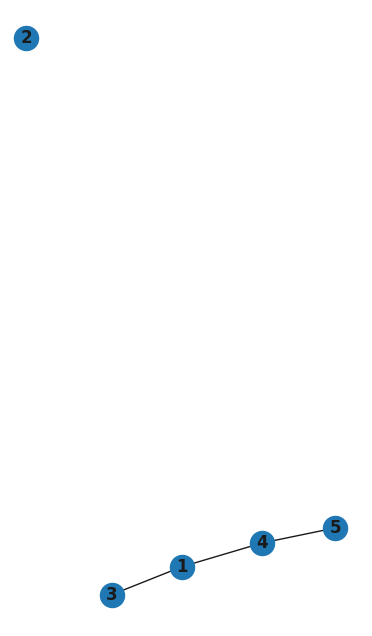

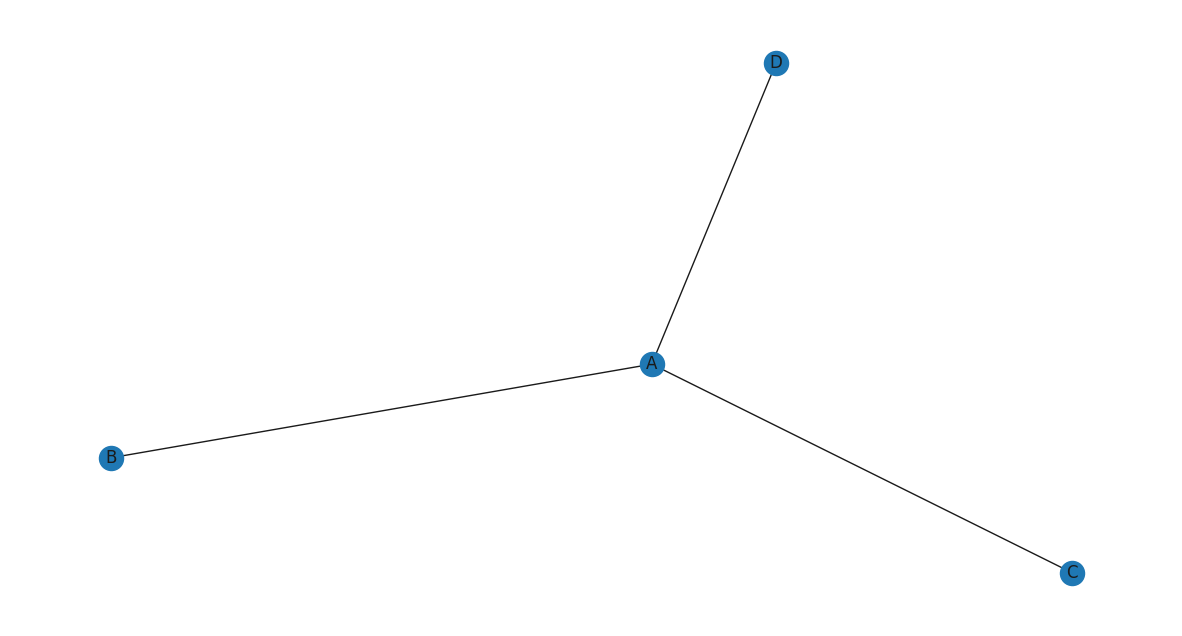

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"})
])
G.add_edge(4, 5)
G.add_edges_from([(1, 4), (1, 3)])

#G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels = True, font_weight = 'bold')
#subax2 = plt.subplot(122)
#nx.draw_shell(G, nlist = [range(5, 10), range(5)], with_labels = True, font_weight = 'bold')

plt.show()


fig, ax = plt.subplots(figsize=(15,8))

relationships = pd.DataFrame({'from': ['A', 'A', 'A'],
                              'to':   ['B', 'C', 'D']})

G1 = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

nx.draw(G1, with_labels=True)

In [ ]:
# Proper distance matrix
price_dist = 1 - price_corr

# Create an absolute value
price_abs = price_corr.abs()
price_dist

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0.000000,0.481114,0.208355,0.625981,0.366369,0.189986,0.155963,0.092859,0.366919,0.127012,...,0.230256,0.697529,0.334034,0.256015,0.157127,0.276060,0.418719,0.177652,0.767174,0.170004
AAL,0.481114,0.000000,0.636023,1.151064,0.263439,0.831155,0.357050,0.384309,0.390014,0.332088,...,0.260104,1.394523,0.547774,0.726544,0.469033,0.935523,0.897818,0.351648,0.454266,0.661761
AAPL,0.208355,0.636023,0.000000,0.568390,0.389887,0.218811,0.446173,0.184007,0.308389,0.357913,...,0.287077,0.467125,0.484245,0.196541,0.355059,0.238291,0.553322,0.283243,0.694522,0.217331
ABBV,0.625981,1.151064,0.568390,0.000000,0.660122,0.294950,0.677300,0.709888,0.775840,0.672011,...,0.640673,0.705561,0.688480,0.325666,0.595008,0.451482,0.290876,0.781215,0.981396,0.866721
ABNB,0.366369,0.263439,0.389887,0.660122,0.000000,0.517361,0.248751,0.216121,0.154146,0.299737,...,0.194684,1.174715,0.601144,0.430521,0.454078,0.650895,0.734601,0.306522,0.428437,0.564400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.276060,0.935523,0.238291,0.451482,0.650895,0.186022,0.430909,0.307596,0.415403,0.409051,...,0.433261,0.371796,0.545835,0.450889,0.280019,0.000000,0.394665,0.296177,0.677770,0.244033
ZBH,0.418719,0.897818,0.553322,0.290876,0.734601,0.273398,0.531318,0.569028,0.768706,0.546591,...,0.511975,0.828263,0.394870,0.351882,0.287867,0.394665,0.000000,0.643664,0.854084,0.707596
ZBRA,0.177652,0.351648,0.283243,0.781215,0.306522,0.368067,0.237197,0.193423,0.198005,0.086959,...,0.151328,0.737799,0.615819,0.500131,0.274444,0.296177,0.643664,0.000000,0.428518,0.232514
ZION,0.767174,0.454266,0.694522,0.981396,0.428437,0.910629,0.515335,0.583896,0.373840,0.628282,...,0.363498,1.284171,0.761140,0.913981,0.552370,0.677770,0.854084,0.428518,0.000000,0.913797


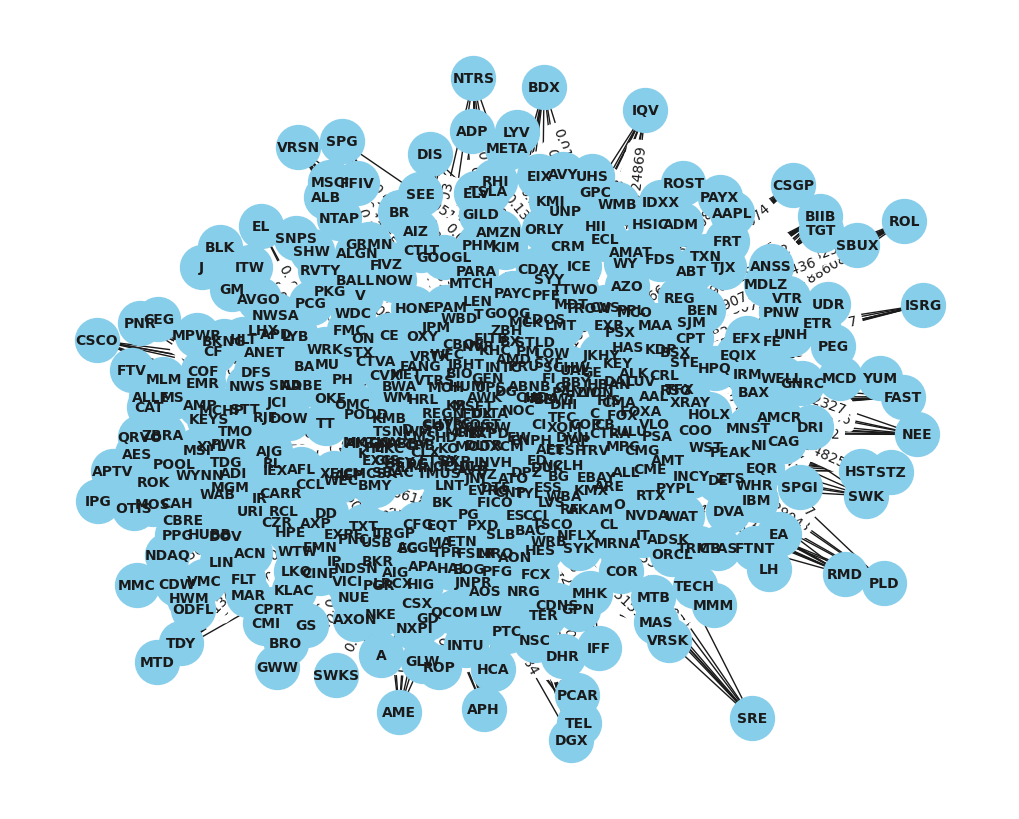

In [ ]:
G = nx.Graph()

# Add nodes
for node in price_abs.index:
  G.add_node(node)

# Add edges with corr values as dist
for i in range(len(price_abs.index)):
  for j in range(i + 1, len(price_abs.index)):
    node1 = price_abs.index[i]
    node2 = price_abs.index[j]
    corr_value = price_abs.loc[node1, node2]
    if abs(corr_value) < 0.15:
      if abs(corr_value) != 0:
        G.add_edge(node1, node2, weight=corr_value)

# Draw the graph
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

# Creating the Regression Model

In [14]:
df_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-02,140.885941,16.120001,145.511963,149.796082,122.379997,101.072723,70.900002,262.179565,333.500000,182.840942,...,112.854485,62.735630,109.543678,37.253830,101.580017,127.485069,122.286400,306.059998,46.931580,167.448669
2023-03-03,143.133438,16.360001,150.617996,151.426208,125.730003,102.865105,71.300003,266.073792,344.040009,184.485214,...,115.262627,63.476685,110.930183,38.301846,103.239075,128.465866,125.497925,309.450012,47.825329,169.415375
2023-03-06,142.437302,16.120001,153.410355,150.669373,126.330002,101.190903,71.699997,266.498810,347.019989,183.762131,...,114.834732,63.427937,111.913513,38.825851,102.891373,128.099319,123.907082,305.809998,47.368736,168.531357
2023-03-07,139.553360,16.360001,151.186447,148.389145,126.940002,98.462944,70.989998,261.131866,344.799988,183.187622,...,112.605705,62.023838,109.750175,38.153538,101.500542,125.741402,122.445488,302.160004,45.114933,165.909073
2023-03-08,140.120193,16.590000,152.452972,145.158035,125.000000,97.891739,70.290001,260.598145,345.839996,184.802185,...,112.983849,62.794144,108.147346,37.520775,101.103157,125.602715,121.212585,307.070007,45.348087,167.508255
2023-03-09,138.161087,15.880000,150.179184,142.974823,119.839996,96.365257,68.379997,256.743439,338.369995,181.820694,...,109.092987,62.647881,107.311501,36.670502,99.821625,124.879494,121.650055,296.910004,40.179882,166.365982
2023-03-10,134.968887,15.460000,148.094894,145.264740,118.300003,95.488762,66.610001,250.012512,329.299988,180.037750,...,107.809311,61.643562,105.984001,36.512310,98.331451,123.423141,122.823318,288.190002,39.198696,160.445969
2023-03-13,135.933517,14.850000,150.059525,147.438232,115.959999,96.700096,65.180000,248.391556,324.269989,180.820267,...,105.729553,63.671700,104.764664,37.125298,97.258530,123.730255,123.539200,284.920013,29.114870,162.313354
2023-03-14,137.634048,14.660000,152.173737,149.281815,116.360001,97.054642,67.339996,249.547974,333.329987,184.812088,...,107.799362,64.320412,105.157997,37.698742,99.245422,125.523445,125.905579,292.459991,30.416636,163.455643
2023-03-15,133.288239,13.860000,152.572662,149.485596,113.580002,96.316025,62.740002,243.311264,333.609985,181.196655,...,104.346359,66.158409,99.926651,36.789146,95.917374,125.949463,124.543419,287.739990,29.833755,162.472290


## Using XGBoost

### Using XGBoost to Predict JPM

In [15]:
# Initializing the Ticker object
JPM_ticker = yf.Ticker('JPM')

# Extracting the history
JP_Morgan_df = JPM_ticker.history(start='2023-03-02', end= '2023-03-20')

In [16]:
JP_Morgan_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-02 00:00:00-05:00,139.143059,139.328910,136.501834,137.998535,11106800,0.0,0.0
2023-03-03 00:00:00-05:00,138.428937,140.610395,138.008307,140.532135,9513100,0.0,0.0
2023-03-06 00:00:00-05:00,140.316899,140.903827,139.553884,139.710403,9261300,0.0,0.0
2023-03-07 00:00:00-05:00,138.918058,139.211529,134.809506,135.601868,11747600,0.0,0.0
2023-03-08 00:00:00-05:00,134.995356,135.572506,133.909523,134.799713,10002500,0.0,0.0
2023-03-09 00:00:00-05:00,133.782337,134.359503,126.406511,127.502121,25888100,0.0,0.0
2023-03-10 00:00:00-05:00,126.152193,132.315013,125.037007,130.740067,37599700,0.0,0.0
2023-03-13 00:00:00-04:00,128.353196,130.965061,126.592384,128.392319,42901100,0.0,0.0
2023-03-14 00:00:00-04:00,132.334583,132.579140,128.431451,131.688950,29648100,0.0,0.0


In [36]:
import xgboost as xgb

# Loading a Pandas into a DMatrix

# Renaming my data
data = JP_Morgan_df.transpose()

# Creating my Label
y = data['2023-03-17 00:00:00-04:00']

# Creating my features
X = data.drop(columns='2023-03-17 00:00:00-04:00', axis=1)

Date,2023-03-02 00:00:00-05:00,2023-03-03 00:00:00-05:00,2023-03-06 00:00:00-05:00,2023-03-07 00:00:00-05:00,2023-03-08 00:00:00-05:00,2023-03-09 00:00:00-05:00,2023-03-10 00:00:00-05:00,2023-03-13 00:00:00-04:00,2023-03-14 00:00:00-04:00,2023-03-15 00:00:00-04:00,2023-03-16 00:00:00-04:00
Open,1.391431e+02,1.384289e+02,1.403169e+02,1.389181e+02,1.349954e+02,1.337823e+02,1.261522e+02,1.283532e+02,1.323346e+02,1.281282e+02,1.252229e+02
High,1.393289e+02,1.406104e+02,1.409038e+02,1.392115e+02,1.355725e+02,1.343595e+02,1.323150e+02,1.309651e+02,1.325791e+02,1.281380e+02,1.290771e+02
Low,1.365018e+02,1.380083e+02,1.395539e+02,1.348095e+02,1.339095e+02,1.264065e+02,1.250370e+02,1.265924e+02,1.284315e+02,1.239707e+02,1.232762e+02
Close,1.379985e+02,1.405321e+02,1.397104e+02,1.356019e+02,1.347997e+02,1.275021e+02,1.307401e+02,1.283923e+02,1.316889e+02,1.254674e+02,1.279032e+02
Volume,1.110680e+07,9.513100e+06,9.261300e+06,1.174760e+07,1.000250e+07,2.588810e+07,3.759970e+07,4.290110e+07,2.964810e+07,3.428060e+07,2.455850e+07
Dividends,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Stock Splits,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


#### Using simplified version of XGBoost

In [37]:
from sklearn.model_selection import train_test_split
# Preparing the Model

# Training and splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


# Early Stopping
early_stop = xgb.callback.EarlyStopping(rounds=2, metric_name='logloss',
                                        data_name='Validation_0',
                                        save_best=True
                                        )


# Creating the Model
reg = xgb.XGBRegressor(tree_method='hist', early_stopping_rounds=2)

# Fitting the model
reg.fit(X_train, y_train, eval_set=[(X_test, y_test)])

reg.save_model("reg.json")

[0]	validation_0-rmse:5836120.16813
[1]	validation_0-rmse:4435436.23036
[2]	validation_0-rmse:3370916.62574
[3]	validation_0-rmse:2561881.62529
[4]	validation_0-rmse:1947015.13167
[5]	validation_0-rmse:1479716.49505
[6]	validation_0-rmse:1124569.62557
[7]	validation_0-rmse:854658.00329
[8]	validation_0-rmse:649525.12514
[9]	validation_0-rmse:493624.12959
[10]	validation_0-rmse:375139.37250
[11]	validation_0-rmse:285090.96508
[12]	validation_0-rmse:216654.17974
[13]	validation_0-rmse:164642.22661
[14]	validation_0-rmse:125113.14150
[15]	validation_0-rmse:95071.03062
[16]	validation_0-rmse:72239.03078
[17]	validation_0-rmse:54886.70863
[18]	validation_0-rmse:41698.94771
[19]	validation_0-rmse:31676.24776
[20]	validation_0-rmse:24058.99616
[21]	validation_0-rmse:18269.88517
[22]	validation_0-rmse:13870.16049
[23]	validation_0-rmse:10526.36974
[24]	validation_0-rmse:7985.08823
[25]	validation_0-rmse:6053.71473
[26]	validation_0-rmse:4585.87102
[27]	validation_0-rmse:3470.30978
[28]	validat

In [38]:
# Checking Predictions
predictions = reg.predict(X_test)

results_df = pd.DataFrame(predictions)

results_df


,0
0,125.814491
1,122.935974


In [27]:
JP_Morgan_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-02 00:00:00-05:00,139.143059,139.328910,136.501834,137.998535,11106800,0.0,0.0
2023-03-03 00:00:00-05:00,138.428937,140.610395,138.008307,140.532135,9513100,0.0,0.0
2023-03-06 00:00:00-05:00,140.316899,140.903827,139.553884,139.710403,9261300,0.0,0.0
2023-03-07 00:00:00-05:00,138.918058,139.211529,134.809506,135.601868,11747600,0.0,0.0
2023-03-08 00:00:00-05:00,134.995356,135.572506,133.909523,134.799713,10002500,0.0,0.0
2023-03-09 00:00:00-05:00,133.782337,134.359503,126.406511,127.502121,25888100,0.0,0.0
2023-03-10 00:00:00-05:00,126.152193,132.315013,125.037007,130.740067,37599700,0.0,0.0
2023-03-13 00:00:00-04:00,128.353196,130.965061,126.592384,128.392319,42901100,0.0,0.0
2023-03-14 00:00:00-04:00,132.334583,132.579140,128.431451,131.688950,29648100,0.0,0.0


#### Using the Demo for Multi-output regression

In [60]:
from sklearn.model_selection import GridSearchCV
xgb_model_jp = xgb.XGBRegressor(
    tree_method='hist'
)

clf = GridSearchCV(
    xgb_model_jp,
    {'max_depth': [2,4,6], "n_estimators":[50,100,200]},
    verbose=1,
)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

nan
{'max_depth': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


### Using XGBoost for all my data

I will now use XGBoost on all my data and check the error. In this situation I will use df_price as my training and testing data.

**X** will feature all columns but my last day
**y** will feature 2023-03-20



In [28]:
df_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-02,140.885941,16.120001,145.511963,149.796082,122.379997,101.072723,70.900002,262.179565,333.500000,182.840942,...,112.854485,62.735630,109.543678,37.253830,101.580017,127.485069,122.286400,306.059998,46.931580,167.448669
2023-03-03,143.133438,16.360001,150.617996,151.426208,125.730003,102.865105,71.300003,266.073792,344.040009,184.485214,...,115.262627,63.476685,110.930183,38.301846,103.239075,128.465866,125.497925,309.450012,47.825329,169.415375
2023-03-06,142.437302,16.120001,153.410355,150.669373,126.330002,101.190903,71.699997,266.498810,347.019989,183.762131,...,114.834732,63.427937,111.913513,38.825851,102.891373,128.099319,123.907082,305.809998,47.368736,168.531357
2023-03-07,139.553360,16.360001,151.186447,148.389145,126.940002,98.462944,70.989998,261.131866,344.799988,183.187622,...,112.605705,62.023838,109.750175,38.153538,101.500542,125.741402,122.445488,302.160004,45.114933,165.909073
2023-03-08,140.120193,16.590000,152.452972,145.158035,125.000000,97.891739,70.290001,260.598145,345.839996,184.802185,...,112.983849,62.794144,108.147346,37.520775,101.103157,125.602715,121.212585,307.070007,45.348087,167.508255
2023-03-09,138.161087,15.880000,150.179184,142.974823,119.839996,96.365257,68.379997,256.743439,338.369995,181.820694,...,109.092987,62.647881,107.311501,36.670502,99.821625,124.879494,121.650055,296.910004,40.179882,166.365982
2023-03-10,134.968887,15.460000,148.094894,145.264740,118.300003,95.488762,66.610001,250.012512,329.299988,180.037750,...,107.809311,61.643562,105.984001,36.512310,98.331451,123.423141,122.823318,288.190002,39.198696,160.445969
2023-03-13,135.933517,14.850000,150.059525,147.438232,115.959999,96.700096,65.180000,248.391556,324.269989,180.820267,...,105.729553,63.671700,104.764664,37.125298,97.258530,123.730255,123.539200,284.920013,29.114870,162.313354
2023-03-14,137.634048,14.660000,152.173737,149.281815,116.360001,97.054642,67.339996,249.547974,333.329987,184.812088,...,107.799362,64.320412,105.157997,37.698742,99.245422,125.523445,125.905579,292.459991,30.416636,163.455643
2023-03-15,133.288239,13.860000,152.572662,149.485596,113.580002,96.316025,62.740002,243.311264,333.609985,181.196655,...,104.346359,66.158409,99.926651,36.789146,95.917374,125.949463,124.543419,287.739990,29.833755,162.472290


In [30]:
# Transpose the data
df_price_T = df_price.transpose()
df_price_T

,2023-03-02,2023-03-03,2023-03-06,2023-03-07,2023-03-08,2023-03-09,2023-03-10,2023-03-13,2023-03-14,2023-03-15,2023-03-16,2023-03-17,2023-03-20
A,140.885941,143.133438,142.437302,139.553360,140.120193,138.161087,134.968887,135.933517,137.634048,133.288239,136.062805,132.442932,133.795395
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000
AAPL,145.511963,150.617996,153.410355,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572662,155.424850,154.577164,156.970612
ABBV,149.796082,151.426208,150.669373,148.389145,145.158035,142.974823,145.264740,147.438232,149.281815,149.485596,150.688766,149.640839,151.484421
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,127.485069,128.465866,128.099319,125.741402,125.602715,124.879494,123.423141,123.730255,125.523445,125.949463,126.870819,125.672058,127.683220
ZBH,122.286400,125.497925,123.907082,122.445488,121.212585,121.650055,122.823318,123.539200,125.905579,124.543419,124.712440,123.598854,125.607300
ZBRA,306.059998,309.450012,305.809998,302.160004,307.070007,296.910004,288.190002,284.920013,292.459991,287.739990,294.929993,288.709991,290.839996
ZION,46.931580,47.825329,47.368736,45.114933,45.348087,40.179882,39.198696,29.114870,30.416636,29.833755,31.193810,29.085726,29.318878


In [42]:
# Splitting my data

data_all = df_price_T
# y_all will be 2023-03-20
y_all = data_all['2023-03-20']
# X_all will be my data excpet 2023-03-20
X_all = data_all.drop(columns='2023-03-20', axis=1)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, random_state=123)


# Early Stopping
early_stop_all = xgb.callback.EarlyStopping(rounds=3, metric_name='logloss',
                                        data_name='Validation_0',
                                        save_best=True
                                        )


# Creating the Model
reg_all = xgb.XGBRegressor(tree_method='hist', early_stopping_rounds=2)

# Fitting the model
reg_all.fit(X_train_all, y_train_all, eval_set=[(X_test_all, y_test_all)])

[0]	validation_0-rmse:90.19760
[1]	validation_0-rmse:62.69130
[2]	validation_0-rmse:42.84040
[3]	validation_0-rmse:30.50519
[4]	validation_0-rmse:22.23441
[5]	validation_0-rmse:16.60651
[6]	validation_0-rmse:12.88926
[7]	validation_0-rmse:10.77961
[8]	validation_0-rmse:9.36735
[9]	validation_0-rmse:8.85573
[10]	validation_0-rmse:8.67463
[11]	validation_0-rmse:8.70296


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=2,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
# Checking Predictions
predictions_all = reg_all.XGBModel.predict(X_test_all)

results2_df = pd.DataFrame(predictions_all)

results2_df = results2_df.transpose()
results2_df

AttributeError: ignored

In [48]:
# Calculating error
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_all = mean_absolute_error(y_test_all, predictions_all)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error for all the data:  {mae_all}")
print(f"Mean Absolute Error for JPMorgan: {mae}")

Mean Absolute Error for all the data:  4.022735702514649
Mean Absolute Error for JPMorgan: 0.13332614852248525


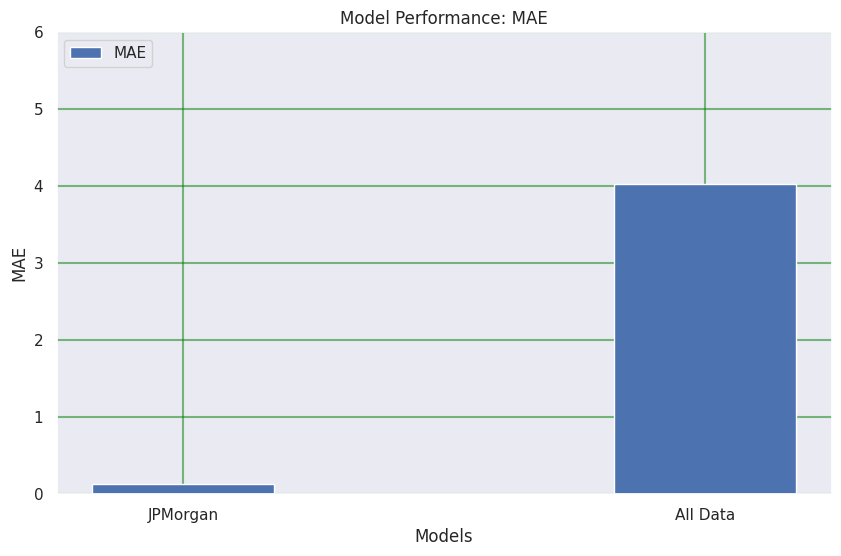

In [51]:
import matplotlib.pyplot as plt
import numpy as np

MAE_Results = [mae, mae_all]
labels = ['JPMorgan', 'All Data']

# Use the length of labels to determine the number of bars
rg = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(rg, MAE_Results, width, label='MAE')
plt.xticks(rg, labels)
plt.xlabel("Models")
plt.ylabel("MAE")

plt.ylim([0, 6])
plt.grid(color='green', linewidth=1.5, axis='both', alpha=0.5)
plt.title('Model Performance: MAE')
plt.legend(loc='upper left', ncol=2)
plt.show()


## Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Features are my daily price percente changes
# My indicator data will be the last day
y = df_price['2023-03-20']
X = price_df.drop(columns = '2023-03-20', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
X_train.head()


,2023-03-03,2023-03-06,2023-03-07,2023-03-08,2023-03-09,2023-03-10,2023-03-13,2023-03-14,2023-03-15,2023-03-16,2023-03-17
WST,0.020329,-0.017798,-0.005288,-0.006124,-0.013793,-0.002410,0.021205,0.022882,-0.009070,0.033232,-0.019886
SBAC,0.011618,-0.016055,-0.039427,0.019263,-0.024764,-0.014973,0.037190,0.006986,0.022170,0.008153,-0.009519
MKC,-0.001917,0.004527,-0.015021,0.008457,-0.010173,-0.014584,0.016491,-0.003882,0.015033,0.004526,-0.008601
FOX,-0.003096,-0.004037,-0.003118,-0.004066,-0.038003,-0.003918,-0.025565,0.015473,-0.011924,0.013074,-0.003971
HUBB,0.014026,-0.001186,-0.011474,0.004923,-0.016888,-0.030547,-0.009612,0.037850,-0.047162,0.031063,-0.027603


In [ ]:
print('Begin Implementation...')

gbdt_2_model = GradientBoostingClassifier(n_estimators=50, max_depth=2)

# Fit the Model
gbdt_2_model.fit(X_train, y_train)

# Make predictions
predict1 = gbdt_2_model.predict_proba(X_test)
gbdt_2_predictions = predict1[:, 1].tolist()

# Create GradientBoostingClassififer model object
gbdt_10_model = GradientBoostingClassifier(n_estimators=50, max_depth=10)

# Fit the Model
gbdt_10_model.fit(X_train, y_train)

# Predict the data
predict2 = gbdt_10_model.predict_proba(X_test)
gbdt_10_predictions = predict2[:, 1].tolist()

print('End')

Begin Implementation...


ValueError: ignored